In [1]:
from train_arcface import train_arcface
from src.utils.model import get_triplet_model, freeze_layer
from src.model.arcface import KSubArcFace, ArcFace_org
import torch
from train_triplet import train_triplet


In [2]:
WEIGHT_PATH = 'weight/backbone_r100_glint360k.pt'
TRAIN_PATH = "Data/Data_train" 
TEST_PATH = "Data/Data_test"
EPOCHS = 1000
BATCH__SIZE = 16

# FINETUNE_PATH = 'weight/model_finetune_arcface_org_best.pth'
# ARCFACE_PATH = 'weight/arcface_org_weight_best.pth'

In [3]:
# model = get_triplet_model(weight_path= WEIGHT_PATH)
# # model.backbone.load_state_dict(torch.load(FINETUNE_PATH, map_location = 'cpu')['model_state_dict'])

# arcface = ArcFace_org(in_features = 512, out_features = 670)
# # arcface.load_state_dict(torch.load(ARCFACE_PATH, map_location = 'cpu')['model_state_dict'])


# train_arcface(model, arcface, TRAIN_PATH, TEST_PATH, EPOCHS, BATCH__SIZE, roc_fig_path='result/arcface_loss_1000+200_epoches.jpg' )

Train Epoch: 1 [0/670 (0%)]	Loss: 0.357798
Train Epoch: 1 [16/670 (2%)]	Loss: 0.342573
Train Epoch: 1 [32/670 (5%)]	Loss: 0.434986
Train Epoch: 1 [48/670 (7%)]	Loss: 0.407838
Train Epoch: 1 [64/670 (10%)]	Loss: 0.398346
Train Epoch: 1 [80/670 (12%)]	Loss: 0.398855
Train Epoch: 1 [96/670 (15%)]	Loss: 0.414684
Train Epoch: 1 [112/670 (17%)]	Loss: 0.445630
Train Epoch: 1 [128/670 (20%)]	Loss: 0.384171
Train Epoch: 1 [144/670 (22%)]	Loss: 0.277604
Train Epoch: 1 [160/670 (24%)]	Loss: 0.372194
Train Epoch: 1 [176/670 (27%)]	Loss: 0.379059
Train Epoch: 1 [192/670 (29%)]	Loss: 0.371550
Train Epoch: 1 [208/670 (32%)]	Loss: 0.401370
Train Epoch: 1 [224/670 (34%)]	Loss: 0.308603
Train Epoch: 1 [240/670 (37%)]	Loss: 0.418574
Train Epoch: 1 [256/670 (39%)]	Loss: 0.337481
Train Epoch: 1 [272/670 (41%)]	Loss: 0.335490
Train Epoch: 1 [288/670 (44%)]	Loss: 0.346591
Train Epoch: 1 [304/670 (46%)]	Loss: 0.355163
Train Epoch: 1 [320/670 (49%)]	Loss: 0.345772
Train Epoch: 1 [336/670 (51%)]	Loss: 0.381561


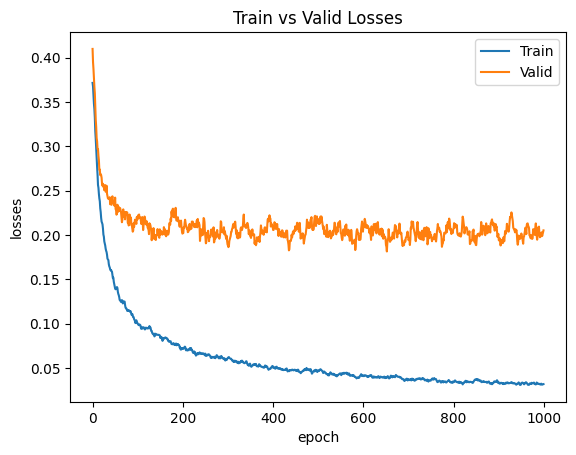

In [4]:
model = get_triplet_model(weight_path= WEIGHT_PATH)
freeze_layer(model, ['253', '254'])
train_triplet(model, TRAIN_PATH, TEST_PATH, EPOCHS, BATCH__SIZE, roc_fig_path='result/finetune_triplet_loss.jpg')